In [1]:
# add matplotliv inline magic command and dependencies
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Files
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


### 5.2.4 Use df.count() to find any nulls!

In [5]:
# get the columns and rows that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# get the columns and rows that are not null
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# get the data types of each columng
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# get the uniques values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# get the number of data points for the "urban" cities
sum(city_data_df["type"]=="Urban")

66

In [10]:
# Inspect the rid_data.csv 

In [11]:
# get the columns and rows that are not null
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [12]:
# Make sure there are no null values, 
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [13]:
#get the data types for each col. of ride.csv
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [14]:
# NOW Merge the data frames 
#Combine data into single dataset.
pyber_data_df = pd.merge(ride_data_df, city_data_df, 
                         how="left", on=["city", "city"])

# display the new dataframe
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


### 5.3.1 Create DataFrames for Each Type of City

#### Completing the steps will be more efficient if we create separate DataFrames for each type and then create Data Series for each step.

In [15]:
# create the urban city dataframe
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
1620,Reynoldsfurt,2019-02-14 11:25:10,39.40,9070692324754,67,Urban
1621,Christopherfurt,2019-03-13 01:47:52,32.05,2788817929605,41,Urban
1622,Raymondhaven,2019-03-20 02:20:34,38.53,8658255136559,11,Urban
1623,Port Johnbury,2019-03-26 07:22:45,7.63,8089282605778,3,Urban


In [16]:
# create suburban and rural dataframes
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"]== "Rural"]


#### 5.3.2 Get the Number of Rides for Each City Type
#### To create a Data Series with one of the columns in a DataFrame, we can use the groupby() function and add the column inside the parentheses.

In [17]:
# get the number of rides for urban cities
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [18]:
# Create same for suburban and rural ride counts
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

#### We now have one of the three datasets we need to create a bubble chart. Next, we'll use the groupby() function on the city type DataFrames to get the average fare for each city type. This will be our second dataset.

In [19]:
#5.3.3 get avg fare per city with grouby() and chain mean()

In [20]:
# get average fare per city in urban cities
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [21]:
# get average fare per city with groupby and mean for suburban & rural
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]


#### 5.3.4 Get the Average Number of Drivers for Each City Type

In [22]:
# we have # of rides, and average fare. How does average number of drivers
#per city affect the rides and fare? 
# get average # of drivers for urban city type
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count

city
Amandaburgh            12.0
Barajasview            26.0
Carriemouth            52.0
Christopherfurt        41.0
Deanville              49.0
                       ... 
West Patrickchester    25.0
West Robert            39.0
West Samuelburgh       73.0
Williamsstad           59.0
Williamsview           46.0
Name: driver_count, Length: 66, dtype: float64

In [23]:
# get average # drivers for the other 2 types, suburb and rural
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]



#### Now we have all our data and can begin to create our bubble chart!  
#### The first scatter plot we'll make is for urban cities. We'll create our plots using the MATLAB method. plt.scatter()

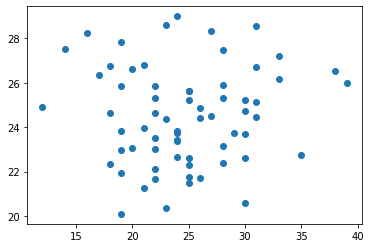

In [24]:
# build the scatter plot for urban cities
plt.scatter(urban_ride_count, urban_avg_fare)

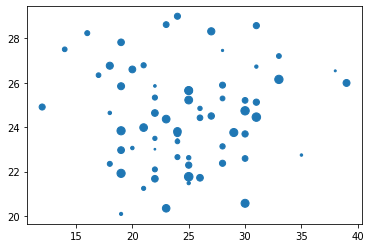

In [25]:
# now add title, axes labels legend, and change color and sizes to scatter
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=urban_driver_count)


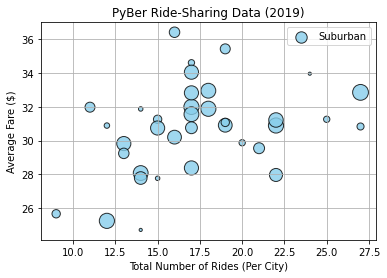

In [26]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()


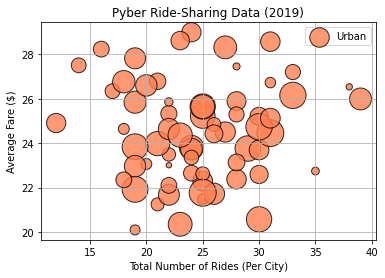

In [27]:
# build scatter plot for urban cities with all the extras
plt.scatter(urban_ride_count,
           urban_avg_fare,
           s=10*urban_driver_count, c="coral",
           edgecolor="black", linewidths=1,
           alpha=0.8, label="Urban")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
#Add the legend
plt.legend()

In [28]:
# ??? Where is the data below? not showing!

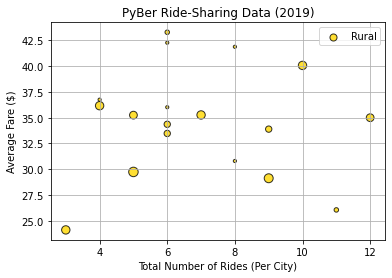

In [29]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

#### 5.3.6 Create scatter chart for all cities

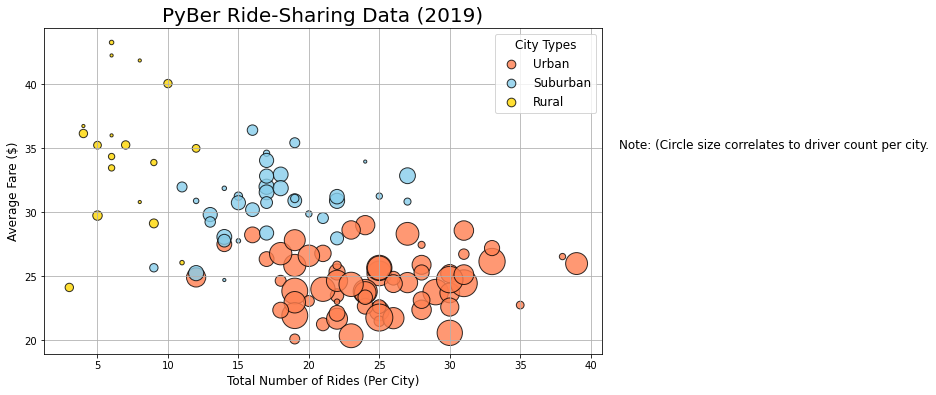

In [68]:
# Add the three scatter charts for 3 city types
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count,
    urban_avg_fare,
    s=10*urban_driver_count, c="coral",
    edgecolor="black", linewidths=1,
    alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
    suburban_avg_fare,
    s=10*suburban_driver_count, c="skyblue",
    edgecolor="black", linewidths=1,
    alpha=0.8, label="Suburban")
                
plt.scatter(rural_ride_count, 
    rural_avg_fare,
    s=10*rural_driver_count, c="gold",
    edgecolor="black", linewidths=1,
    alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# create a legend to fix markers to be same size
lgnd = plt.legend(fontsize="12", mode="Expanded",
        scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

#REMOVED plt.legend to allow the legend above to work!!
#add legend
#plt.legend()

# add a text label acout circle size
plt.text(42, 35, "Note: (Circle size correlates to driver count per city.", fontsize="12")

# save the figure
plt.savefig("/Users/damonphillips/Desktop/bootcamp/week_5_Matplotlib/PyBer_Analysis/Fig1.png")

# Show the plot
plt.show()